In [3]:
%%javascript
require.config({ 
    paths: { 
    d3: 'https://d3js.org/d3.v7.min'
}});

require(["d3"], function(d3) {
    window.d3 = d3;
});

<IPython.core.display.Javascript object>

In [4]:
%reset -f
import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
from importlib import reload

#reload(sparg)
warnings.simplefilter("always")

In [5]:
ts = tskit.load("slim/slim_0.25rep1sigma.trees")

for sd in range(4):
    np.random.seed(sd)
    keep_nodes = list(np.random.choice(ts.samples(), 100, replace=False))
    ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
    ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
    ts_chopped = ts_filtered.decapitate(10000)
    ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

    outfile = open("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_" + str(sd) + "_chopped_10000.txt", "w")
    i = 0
    ts_breaks = ts_chopped_attached.breakpoints(as_array=True)
    print(len(ts_breaks))
    FI1_trees = []
    FI2_trees = []
    sigma_trees = [] 
    for (bp_i,bp) in enumerate(ts_breaks):
        if bp_i > 0:
            if bp_i in range(0,1551,10):
                print(sd, bp_i)
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.remove_uninformative_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)

            ts_tree = ts_short_attached.keep_intervals(intervals=[(ts_breaks[bp_i-1],bp)], simplify=False).trim() 

            dispersal_rate, cov_mat, paths, FI1, FI2 = sparg.estimate_minimal_spatial_parameters(ts=ts_short_attached)
            dispersal_rate_tree, cov_mat_tree, paths_tree, FI1_tree, FI2_tree = sparg.estimate_minimal_spatial_parameters(ts=ts_tree)
            FI1_trees += [ dispersal_rate_tree[0][0]**2*FI1 ]
            FI2_trees += [ dispersal_rate_tree[0][0]**3*FI2 ]
            sigma_trees += [ dispersal_rate_tree[0][0] ]


            sigma_avg = np.average(sigma_trees)
            FI1_avg = np.sum(FI1_trees)/(sigma_avg**2)
            FI2_avg = np.sum(FI2_trees)/(sigma_avg**3)

            #dispersal_rate_rank, FI_rank, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts_short_attached, minimal = False, n_r = 'Rank', fisher_info=True)
            outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(FI1 + FI2)+ " " + str(sigma_avg) + " " + str(FI1_avg + FI2_avg) + "\n")
            #print("Number of trees:", ts_short_attached.num_trees)
            #print("Sequence length:", int(bp))
            #print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            #print("Rank of the Matrix:", np.linalg.matrix_rank(cov_mat))
            #print("Number of Paths:", cov_mat.shape)
            #if ts_short_attached.num_trees == 2:
            #    viz.D3ARG(ts=ts_short_attached).draw()

    outfile.close()

1546
0 0
0 0
0 0


KeyboardInterrupt: 

In [11]:
ts_chopped_attached.breakpoints(as_array=True)

array([      0.,    1459.,    1794., ...,  999288.,  999586., 1000000.])

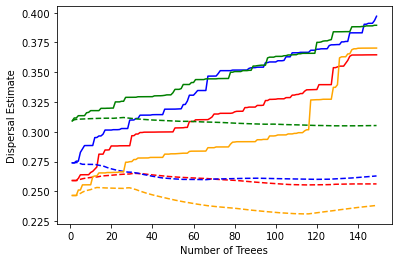

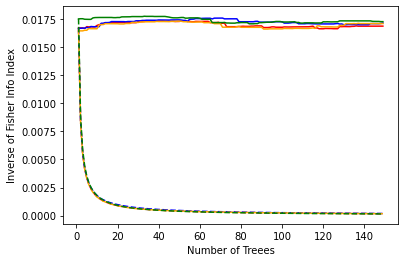

'\nplt.plot(dispersal_1[:,0], dispersal_1[:,5])\nplt.plot(dispersal_2[:,0], dispersal_2[:,5])\nplt.plot(dispersal_3[:,0], dispersal_3[:,5])\nplt.plot(dispersal_4[:,0], dispersal_4[:,5])\nplt.xlabel("Number of Trees")\nplt.ylabel("Dispersal Estimate - Rnk")\nplt.show()\n\nplt.plot(dispersal_1[:,0], 1/dispersal_1[:,7])\nplt.plot(dispersal_2[:,0], 1/dispersal_2[:,7])\nplt.plot(dispersal_3[:,0], 1/dispersal_3[:,7])\nplt.plot(dispersal_4[:,0], 1/dispersal_4[:,7])\nplt.xlabel("Number of Treees")\nplt.ylabel("Inverse of Fisher Info Index - Rnk")\nplt.show()\n'

In [14]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_0_chopped_10000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2], color='red')
plt.plot(dispersal_1[:,0], dispersal_1[:,5], color = 'red', linestyle = "--")

dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_1_chopped_10000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2], color = 'blue')
plt.plot(dispersal_2[:,0], dispersal_2[:,5], color = 'blue', linestyle = "--")

dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_2_chopped_10000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2], color = 'orange')
plt.plot(dispersal_3[:,0], dispersal_3[:,5], color = 'orange', linestyle = "--")

dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_3_chopped_10000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2], color='green')
plt.plot(dispersal_4[:,0], dispersal_4[:,5], color = 'green', linestyle = "--")

plt.xlabel("Number of Treees")
plt.ylabel("Dispersal Estimate")
plt.show()

plt.plot(dispersal_1[:,0], 1/(np.array(dispersal_1[:,4])*np.array(dispersal_1[:,2])*np.array(dispersal_1[:,2])), color = 'red' ) 
plt.plot(dispersal_1[:,0], 1/(np.array(dispersal_1[:,6])*np.array(dispersal_1[:,5])*np.array(dispersal_1[:,5])), linestyle= '--', color ='red' ) 

plt.plot(dispersal_2[:,0], 1/(np.array(dispersal_2[:,4])*np.array(dispersal_2[:,2])*np.array(dispersal_2[:,2])), color ='blue' ) 
plt.plot(dispersal_2[:,0], 1/(np.array(dispersal_2[:,6])*np.array(dispersal_2[:,5])*np.array(dispersal_2[:,5])), linestyle= '--', color ='blue' ) 

plt.plot(dispersal_3[:,0], 1/(np.array(dispersal_3[:,4])*np.array(dispersal_3[:,2])*np.array(dispersal_3[:,2])), color = 'orange' ) 
plt.plot(dispersal_3[:,0], 1/(np.array(dispersal_3[:,6])*np.array(dispersal_3[:,5])*np.array(dispersal_3[:,5])), linestyle= '--', color ='orange' ) 

plt.plot(dispersal_4[:,0], 1/(np.array(dispersal_4[:,4])*np.array(dispersal_4[:,2])*np.array(dispersal_4[:,2])), color ='green' ) 
plt.plot(dispersal_4[:,0], 1/(np.array(dispersal_4[:,6])*np.array(dispersal_4[:,5])*np.array(dispersal_4[:,5])), linestyle= '--', color ='green' ) 

plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index")
plt.show()
"""
plt.plot(dispersal_1[:,0], dispersal_1[:,5])
plt.plot(dispersal_2[:,0], dispersal_2[:,5])
plt.plot(dispersal_3[:,0], dispersal_3[:,5])
plt.plot(dispersal_4[:,0], dispersal_4[:,5])
plt.xlabel("Number of Trees")
plt.ylabel("Dispersal Estimate - Rnk")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,7])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,7])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,7])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,7])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index - Rnk")
plt.show()
"""

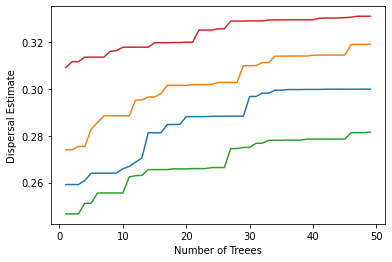

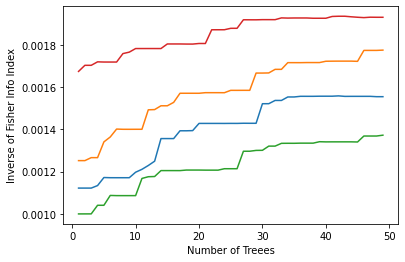

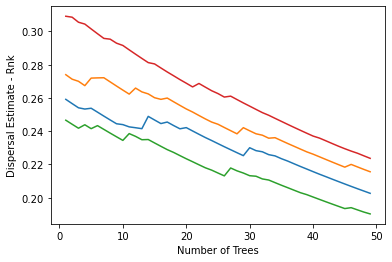

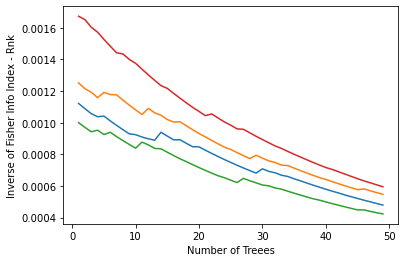

In [60]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_0_chopped_10000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])

dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_1_chopped_10000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])

dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_2_chopped_10000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])

dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_3_chopped_10000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.xlabel("Number of Treees")
plt.ylabel("Dispersal Estimate")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,4])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,4])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,4])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,4])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index")
plt.show()

plt.plot(dispersal_1[:,0], dispersal_1[:,5])
plt.plot(dispersal_2[:,0], dispersal_2[:,5])
plt.plot(dispersal_3[:,0], dispersal_3[:,5])
plt.plot(dispersal_4[:,0], dispersal_4[:,5])
plt.xlabel("Number of Trees")
plt.ylabel("Dispersal Estimate - Rnk")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,7])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,7])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,7])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,7])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index - Rnk")
plt.show()



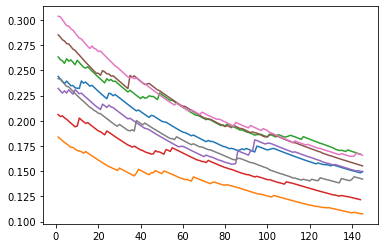

In [61]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_0_chopped_4000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])
plt.plot(dispersal_1[:,0], dispersal_1[:,3])
dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_1_chopped_4000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])
plt.plot(dispersal_2[:,0], dispersal_2[:,3])
dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_2_chopped_4000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])
plt.plot(dispersal_3[:,0], dispersal_3[:,3])
dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.plot(dispersal_4[:,0], dispersal_4[:,3])
plt.show()

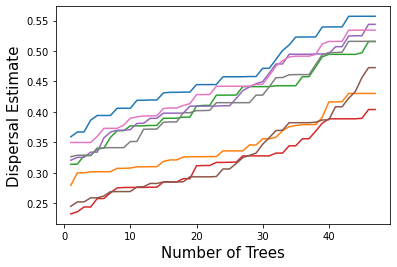

In [62]:
dispersal_1 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_1_chopped_4000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])
plt.plot(dispersal_1[:,0], dispersal_1[:,3])
dispersal_2 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_2_chopped_4000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])
plt.plot(dispersal_2[:,0], dispersal_2[:,3])
dispersal_3 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_3_chopped_4000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])
plt.plot(dispersal_3[:,0], dispersal_3[:,3])
dispersal_4 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_4_chopped_4000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.plot(dispersal_4[:,0], dispersal_4[:,3])
plt.xlabel("Number of Trees", fontsize = 15)
plt.ylabel("Dispersal Estimate", fontsize = 15)
plt.show()


In [7]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")

np.random.seed(3)
keep_nodes = list(np.random.choice(ts.samples(), 5, replace=False))
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
ts_chopped = ts_filtered.decapitate(4000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

outfile = open("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt", "w")
i = 0
for bp in ts_chopped_attached.breakpoints():
    if i < 20:
        if i > 0:
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
            dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
            outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(len(paths)) + "\n")
            print("Number of trees:", ts_short_attached.num_trees)
            print("Sequence length:", int(bp))
            print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            #if ts_short_attached.num_trees == 2:
            #    viz.D3ARG(ts=ts_short_attached).draw()
    else:
        break
    i += 1
outfile.close()

AttributeError: module 'sparg' has no attribute 'new_remove_useless_nodes'

# Minimal Covariance Matrix

In [3]:
tables = tskit.TableCollection(sequence_length=1e3)

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 2)  # Node 2
node_table.add_row(time=1)  # Node 3
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 4
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 5
node_table.add_row(time=3)  # Node 6
node_table.add_row(time=4)  # Node 7

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=3, child=0)
edge_table.add_row(left=0, right=1e3, parent=3, child=1)
edge_table.add_row(left=0, right=1e3, parent=6, child=2)
edge_table.add_row(left=0, right=500, parent=4, child=3)
edge_table.add_row(left=500, right=1e3, parent=5, child=3)
edge_table.add_row(left=500, right=1e3, parent=6, child=5)
edge_table.add_row(left=0, right=500, parent=7, child=4)
edge_table.add_row(left=0, right=500, parent=7, child=6)

individuals_table = tables.individuals 
individuals_table.add_row(flags = 0)
individuals_table.add_row(flags = 0)
individuals_table.add_row(flags = 0)

tables.sort()


ts = tables.tree_sequence()
viz.D3ARG(ts=ts).draw(edge_type="ortho")
ts = sparg.ts_singlecompound_3sam(t=10)
viz.D3ARG(ts=ts).draw(edge_type="ortho")

/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [78]:
cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts)
cov_mat, paths = sparg.calc_covariance_matrix(ts)
print(cov_mat, paths)
print(cov_min_mat, min_paths )

[[4. 3. 0. 2. 1.]
 [3. 4. 0. 1. 2.]
 [0. 0. 4. 1. 1.]
 [2. 1. 1. 4. 3.]
 [1. 2. 1. 3. 4.]] [[0, 3, 4, 7], [1, 3, 4, 7], [2, 6, 7], [0, 3, 5, 6, 7], [1, 3, 5, 6, 7]]
[[4. 1. 0. 2.]
 [1. 4. 1. 3.]
 [0. 1. 4. 1.]
 [2. 3. 1. 4.]] [[0, 3, 4, 7], [1, 3, 5, 6, 7], [2, 6, 7], [0, 3, 5, 6, 7]]


In [79]:
node_locations = {0:[0], 1:[1], 2:[2]}

sigma, cov_mat, paths = sparg.estimate_minimal_spatial_parameters(ts=ts, locations_of_individuals=node_locations)
sigma_min, min_cov_mat, min_paths = sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

In [14]:
sparg.estimate_minimal_spatial_parameters?

In [16]:
print(sigma, sigma_min)

[[0.30952381]] [[0.30952381]]


In [16]:
def remove_uninformative_nodes(ts, keep_young_nodes={}):
    uniq_child_parent = np.unique(np.column_stack((ts.edges_child, ts.edges_parent)), axis=0) #Find unique parent-child pairs. 
    nd, count = np.unique(uniq_child_parent[:, 1], return_counts=True) #For each child, count how many parents it has. 
    coal_nodes = nd[count > 1] #Find parent who have more than 1 children.
    recomb_nodes_first_id = np.where(ts.tables.nodes.flags==131072)[0][::2]
    important_recomb_nodes = []
    for node in recomb_nodes_first_id:
        if node in uniq_child_parent[:,0]:# or (node in uniq_child_parent[:,1]):
            if (node+1) in uniq_child_parent[:,0]:# or (node+1 in uniq_child_parent[:,1]):
                #print(uniq_child_parent[np.where(uniq_child_parent[:,0]==348)[0],:])
                important_recomb_nodes.append(node)
                important_recomb_nodes.append(node+1)
    max_time = max(ts.tables.nodes[nd_id].time for nd_id in np.union1d(ts.edges_child, ts.edges_parent) )
    #print(max_time)
    roots = np.where(ts.tables.nodes.time == max_time)[0]
    #print(roots)
    critical_nodes = list(np.unique( list(ts.samples()) + list(np.unique(important_recomb_nodes)) + list(np.unique(coal_nodes)) + list(np.unique(roots))))
    if len(keep_young_nodes) > 0:
        critical_nodes = list(np.unique(critical_nodes + list(np.where((ts.tables.nodes.time<=keep_young_nodes["below"]) & (ts.tables.nodes.time%keep_young_nodes["step"]==0))[0])))
    ts_final, maps = ts.simplify(samples=critical_nodes, map_nodes = True, keep_input_roots=False, keep_unary=False, update_sample_flags = False)
    return ts_final, maps

import time
seed = 100
outfile = open("Minimal_CovMat_Data.txt", "w")
break_flag = False 

for n in range(2,40): 
    for rep in range(10): 
        print("Rep",n,rep)
        ts = msprime.sim_ancestry(samples=n, recombination_rate=1e-6, sequence_length=50, population_size=10_000, record_full_arg=True, random_seed = rep+seed)    
        ts_chopped = ts.decapitate(5000)
        ts_short_sim, maps_short_sim = sparg.remove_uninformative_nodes(ts=ts_chopped)
        ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
        ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
        
        ts_short_sim1, maps_short_sim1 = remove_uninformative_nodes(ts=ts_chopped)
        ts_short_merged1 = sparg.merge_unnecessary_roots(ts=ts_short_sim1)
        ts_short_attached1, maps_short_attached1 = sparg.remove_unattached_nodes(ts=ts_short_merged1)
        
        
        
        min_start_time = time.time() 
        cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts_short_attached)
        min_end_time = time.time()
        
        cov_min_mat1, min_paths1 = sparg.calc_minimal_covariance_matrix(ts_short_attached1)
        
        
        full_start_time = time.time()
        cov_mat, paths = sparg.calc_covariance_matrix(ts_short_attached)
        full_end_time = time.time() 
        print(len(cov_min_mat), len(cov_mat), np.linalg.matrix_rank(cov_min_mat), np.linalg.matrix_rank(cov_mat))
        print(len(cov_min_mat1), np.linalg.matrix_rank(cov_min_mat1),ts_short_attached1.num_trees+ts_short_attached1.num_samples-1)
        
        
        """if np.linalg.matrix_rank(cov_min_mat) != len(cov_min_mat):
            ts_new = ts
            break_flag = True 
            print("Broke")
            break"""

        outfile.write(str(n) + " " + str(len(cov_mat)) + " " + str(len(cov_min_mat)) + " " + str( np.linalg.matrix_rank(cov_mat)) + " " + str(min_end_time - min_start_time) + " " + str(full_end_time - full_start_time) + "\n")
        #node_locations = {i:[np.random.uniform(0,100)] for i in range(100)}
        #sigma, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = False, locations_of_individuals=node_locations)
        #sigma_min, min_cov_mat, min_paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = True,  locations_of_individuals=node_locations)
    
        #print(sigma, sigma_min)  
    if break_flag: 
        break

/tmp/ipykernel_19036/2632470530.py:25: ResourceWarning: unclosed file <_io.TextIOWrapper name='Minimal_CovMat_Data.txt' mode='w' encoding='UTF-8'>
  outfile = open("Minimal_CovMat_Data.txt", "w")


Rep 2 0
2 2 2 2
4 4 4
Rep 2 1
6 7 6 6
6 6 6
Rep 2 2
4 4 3 3
5 5 5
Rep 2 3
4 4 4 4
4 4 4
Rep 2 4
3 3 3 3
4 4 4
Rep 2 5
3 3 3 3
5 5 5
Rep 2 6
5 5 4 4
6 6 6
Rep 2 7
7 9 5 5
7 7 7
Rep 2 8
4 4 3 3
6 6 6
Rep 2 9
2 2 2 2
4 4 4
Rep 3 0
6 6 6 6
8 8 8
Rep 3 1
9 12 9 9
10 10 10
Rep 3 2
7 8 7 7
7 7 7
Rep 3 3
5 5 5 5
6 6 6
Rep 3 4
9 12 7 7
9 9 9
Rep 3 5
4 4 4 4
7 7 7
Rep 3 6
6 6 4 4
8 8 8
Rep 3 7
8 8 8 8
9 9 9
Rep 3 8
9 9 8 8
9 9 9
Rep 3 9
4 4 4 4
6 6 6
Rep 4 0
9 9 9 9
10 10 10
Rep 4 1
13 16 12 12
13 13 13
Rep 4 2
8 10 7 7
9 9 9
Rep 4 3
6 6 6 6
8 8 8
Rep 4 4
11 15 9 9
12 12 12
Rep 4 5
7 7 7 7
9 9 9
Rep 4 6
8 8 7 7
10 10 10
Rep 4 7
11 12 11 11
11 11 11
Rep 4 8
9 9 9 9
11 11 11
Rep 4 9
9 9 9 9
9 9 9
Rep 5 0
9 10 9 9
12 12 12
Rep 5 1
15 16 15 15
15 15 14
Rep 5 2
12 14 10 10
12 12 12
Rep 5 3
9 9 9 9
10 10 10
Rep 5 4
14 17 14 14
14 14 14
Rep 5 5
9 9 9 9
11 11 11
Rep 5 6
9 9 9 9
12 12 12
Rep 5 7
12 12 12 12
13 13 13
Rep 5 8
12 12 11 11
14 14 14
Rep 5 9
8 8 8 8
11 11 11
Rep 6 0
12 12 12 12
14 14 14
Rep 6 

67 103 64 64
68 68 67
Rep 30 8
64 65 64 64
64 64 64
Rep 30 9
63 78 63 63
63 63 63
Rep 31 0
71 77 70 70
71 71 70
Rep 31 1
63 67 63 63
65 65 65
Rep 31 2
63 97 62 62
66 66 66
Rep 31 3
61 61 61 61
62 62 62
Rep 31 4
67 76 67 67
68 68 68
Rep 31 5
66 70 66 66
66 66 66
Rep 31 6
62 63 62 62
64 64 64
Rep 31 7
68 97 68 68
69 69 67
Rep 31 8
67 95 66 66
67 67 67
Rep 31 9
64 75 64 64
65 65 65
Rep 32 0
72 80 71 71
73 73 72
Rep 32 1
64 64 64 64
67 67 67
Rep 32 2
68 100 68 68
68 68 68
Rep 32 3
61 61 61 61
64 64 64
Rep 32 4
68 83 68 68
70 70 69
Rep 32 5
66 66 66 66
66 66 66
Rep 32 6
66 84 65 65
67 67 67
Rep 32 7
66 86 65 65
68 68 68
Rep 32 8
69 70 68 68
69 69 69
Rep 32 9
67 75 67 67
67 67 67
Rep 33 0
74 82 73 73
75 75 74
Rep 33 1
70 80 69 69
70 70 69
Rep 33 2
70 97 69 69
70 70 70
Rep 33 3
66 66 66 66
66 66 66
Rep 33 4
71 82 71 71
72 72 72
Rep 33 5
69 82 68 68
69 69 69
Rep 33 6
69 102 69 69
70 70 70
Rep 33 7
69 79 68 68
70 70 70
Rep 33 8
70 94 70 70
71 71 71
Rep 33 9
69 78 69 69
69 69 69
Rep 34 0
77 89 7

In [88]:
viz.D3ARG(ts=ts_new).draw(edge_type="ortho")

print(ts_new.tables.nodes)
print(ts_new.tables.edges)

ts_chopped = ts_new.decapitate(5000)

print(ts_chopped.tables.nodes)
print(ts_chopped.tables.edges)

def remove_uninformative_nodes(ts, keep_young_nodes={}):
    uniq_child_parent = np.unique(np.column_stack((ts.edges_child, ts.edges_parent)), axis=0) #Find unique parent-child pairs. 
    nd, count = np.unique(uniq_child_parent[:, 1], return_counts=True) #For each child, count how many parents it has. 
    coal_nodes = nd[count > 1] #Find parent who have more than 1 children.
    recomb_nodes_first_id = np.where(ts.tables.nodes.flags==131072)[0][::2]
    important_recomb_nodes = []
    for node in recomb_nodes_first_id:
        if node in uniq_child_parent[:,0]:# or (node in uniq_child_parent[:,1]):
            if (node+1) in uniq_child_parent[:,0]:# or (node+1 in uniq_child_parent[:,1]):
                #print(uniq_child_parent[np.where(uniq_child_parent[:,0]==348)[0],:])
                important_recomb_nodes.append(node)
                important_recomb_nodes.append(node+1)
    max_time = max(ts.tables.nodes[nd_id].time for nd_id in np.union1d(ts.edges_child, ts.edges_parent) )
    print(max_time)
    roots = np.where(ts.tables.nodes.time == max_time)[0]
    print(roots)
    critical_nodes = list(np.unique( list(ts.samples()) + list(np.unique(important_recomb_nodes)) + list(np.unique(coal_nodes)) + list(np.unique(roots))))
    if len(keep_young_nodes) > 0:
        critical_nodes = list(np.unique(critical_nodes + list(np.where((ts.tables.nodes.time<=keep_young_nodes["below"]) & (ts.tables.nodes.time%keep_young_nodes["step"]==0))[0])))
    ts_final, maps = ts.simplify(samples=critical_nodes, map_nodes = True, keep_input_roots=False, keep_unary=False, update_sample_flags = False)
    return ts_final, maps 


ts_short_sim, maps_short_sim = remove_uninformative_nodes(ts=ts_chopped)

print(ts_short_sim.tables.nodes)
print(ts_short_sim.tables.edges)

ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)

print(ts_short_attached.tables.nodes)
print(ts_short_attached.tables.edges)

cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts_short_attached)
print(len(cov_min_mat), np.linalg.matrix_rank(cov_min_mat))
print(min_paths, cov_min_mat)

/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


╔══╤══════╤══════════╤══════════╤══════════════╤════════╗
║id│flags │population│individual│time          │metadata║
╠══╪══════╪══════════╪══════════╪══════════════╪════════╣
║0 │     1│         0│         0│    0.00000000│        ║
║1 │     1│         0│         0│    0.00000000│        ║
║2 │     1│         0│         1│    0.00000000│        ║
║3 │     1│         0│         1│    0.00000000│        ║
║4 │     0│         0│        -1│ 1689.20981652│        ║
║5 │131072│         0│        -1│ 4108.59341117│        ║
║6 │131072│         0│        -1│ 4108.59341117│        ║
║7 │     0│         0│        -1│ 6990.27212828│        ║
║8 │     0│         0│        -1│ 8210.40550172│        ║
║9 │131072│         0│        -1│15061.73740407│        ║
║10│131072│         0│        -1│15061.73740407│        ║
║11│262144│         0│        -1│16816.94150301│        ║
║12│     0│         0│        -1│17071.33406486│        ║
╚══╧══════╧══════════╧══════════╧══════════════╧════════╝

╔══╤════╤════

In [37]:
ts.tables.nodes[0].time

0.0

In [23]:
print(ts_new.tables.nodes)
print(ts_new.tables.edges)
print(min_paths)
print(paths)
print(cov_min_mat)


╔══╤══════╤══════════╤══════════╤══════════════╤════════╗
║id│flags │population│individual│time          │metadata║
╠══╪══════╪══════════╪══════════╪══════════════╪════════╣
║0 │     1│         0│         0│    0.00000000│        ║
║1 │     1│         0│         0│    0.00000000│        ║
║2 │     1│         0│         1│    0.00000000│        ║
║3 │     1│         0│         1│    0.00000000│        ║
║4 │     0│         0│        -1│ 1689.20981652│        ║
║5 │131072│         0│        -1│ 4108.59341117│        ║
║6 │131072│         0│        -1│ 4108.59341117│        ║
║7 │     0│         0│        -1│ 6990.27212828│        ║
║8 │     0│         0│        -1│ 8210.40550172│        ║
║9 │131072│         0│        -1│15061.73740407│        ║
║10│131072│         0│        -1│15061.73740407│        ║
║11│262144│         0│        -1│16816.94150301│        ║
║12│     0│         0│        -1│17071.33406486│        ║
╚══╧══════╧══════════╧══════════╧══════════════╧════════╝

╔══╤════╤════

In [5]:
print(ts_short_attached.tables.edges[np.where(ts_short_attached.tables.edges.child == 74)[0]])
a = {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 45: [0], 46: [40], 40: [1], 41: [41], 58: [2], 59: [42], 104: [3], 105: [43], 112: [4], 113: [44], 90: [5], 91: [45], 49: [6, 14], 43: [7], 44: [46], 117: [8], 92: [9, 25], 102: [10], 97: [11, 26], 135: [12], 54: [13, 15, 20], 42: [15, 20], 47: [16], 48: [47], 66: [17, 39], 101: [18, 30], 62: [19, 22], 63: [21, 33], 56: [22], 57: [48], 187: [23], 74: [24, 34, 57], 68: [26], 69: [49], 115: [27, 31, 48], 98: [28], 67: [29, 35], 70: [31, 48], 77: [32, 2], 50: [34], 51: [50], 52: [36], 53: [51], 99: [37], 100: [52], 93: [38, 58, 36], 64: [1], 65: [53], 82: [41], 83: [54], 84: [7, 1], 116: [46, 51], 121: [0], 158: [40], 159: [55], 210: [16], 55: [47, 36], 107: [6], 108: [56, 14], 60: [34], 61: [57], 118: [50], 141: [13, 15, 20], 72: [47], 73: [58, 36], 139: [42], 71: [34, 57], 170: [19], 171: [59, 22], 130: [21], 131: [60, 33], 89: [53], 172: [17, 39], 78: [29], 79: [61, 35], 80: [49], 81: [62], 87: [47], 88: [63], 75: [24, 34, 57], 76: [], 85: [24, 34, 57], 86: []}
paths = [[0, 45, 121], [1, 40, 64, 84], [2, 58, 77], [3, 104], [4, 112], [5, 90], [6, 49, 107], [7, 43, 84], [8, 117], [9, 92], [10, 102], [11, 97], [12, 135], [13, 54, 141], [14, 49, 108], [15, 42, 54, 141], [16, 47, 210], [17, 66, 172], [18, 101], [19, 62, 170], [20, 42, 54, 141], [21, 63, 130], [22, 56, 62, 171], [23, 187], [24, 74, 75, 85], [25, 92], [26, 68, 97], [27, 115], [28, 98], [29, 67, 78], [30, 101], [31, 70, 115], [32, 77], [33, 63, 131], [34, 50, 60, 71, 74, 75, 85], [35, 67, 79], [36, 52, 55, 73, 93], [37, 99], [38, 93], [39, 66, 172], [0, 46, 158], [1, 41, 82], [2, 59, 139], [3, 105], [4, 113], [5, 91], [7, 44, 116], [16, 48, 55, 72, 87], [22, 57, 70, 115], [26, 69, 80], [34, 51, 118], [36, 53, 116], [37, 100], [1, 40, 65, 89], [1, 41, 83], [0, 46, 159], [6, 49, 108], [34, 50, 61, 71, 74, 75, 85], [16, 48, 55, 73, 93], [19, 62, 171], [21, 63, 131], [29, 67, 79], [26, 69, 81], [16, 48, 55, 72, 88]]
print(a[74], a[75], a[76])
print(paths[24],paths[34], paths[57])


╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  829│    75│   74│        ║
║1 │ 829│ 1000│    76│   74│        ║
╚══╧════╧═════╧══════╧═════╧════════╝

[24, 34, 57] [24, 34, 57] []
[24, 74, 75, 85] [34, 50, 60, 71, 74, 75, 85] [34, 50, 61, 71, 74, 75, 85]


In [40]:
np.random.uniform(0,100)


72.0324493442158

In [41]:
ts_new.draw_svg()
cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts_new)
cov_mat, paths = sparg.calc_covariance_matrix(ts_new)
print(len(cov_min_mat), len(cov_mat), np.linalg.matrix_rank(cov_min_mat), np.linalg.matrix_rank(cov_mat))


13 14 11 11


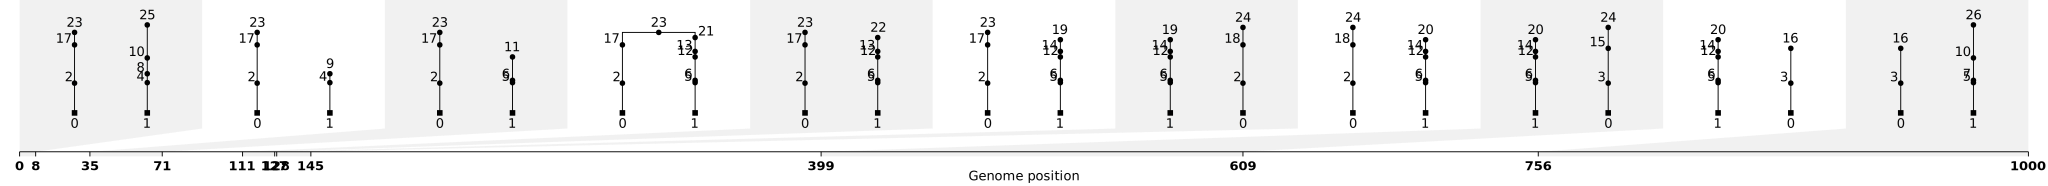

In [42]:
ts_new.draw_svg()

In [43]:
ts_new.tables.edges

id,left,right,parent,child,metadata
0,0,399,2,0,
1,399,1000,3,0,
2,0,35,4,1,
3,35,1000,5,1,
4,35,756,6,5,
5,756,1000,7,5,
6,0,8,8,4,
7,8,35,9,4,
8,756,1000,10,7,
9,0,8,10,8,


In [36]:
ts_new.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,0,0.00000000,
2,131072,0,-1,443.96869070,
3,131072,0,-1,443.96869070,
4,131072,0,-1,1990.34663844,
5,131072,0,-1,1990.34663844,
6,131072,0,-1,2838.01027670,
7,131072,0,-1,2838.01027670,
8,131072,0,-1,3350.61144254,
9,131072,0,-1,3350.61144254,


In [37]:
min_paths

[[0, 2, 4, 8, 12, 19],
 [1, 10, 16, 18, 19],
 [0, 3, 16, 17, 20],
 [1, 11, 14],
 [0, 2, 5, 6],
 [0, 2, 4, 9],
 [0, 2, 5, 7, 20],
 [0, 2, 4, 8, 13],
 [1, 11, 15],
 [0, 3, 16, 18, 19]]

In [38]:
paths

[[0, 2, 4, 8, 12, 19],
 [1, 10, 16, 17, 20],
 [0, 3, 16, 17, 20],
 [1, 11, 14],
 [0, 2, 5, 6],
 [0, 2, 4, 9],
 [0, 2, 5, 7, 20],
 [0, 2, 4, 8, 13],
 [1, 11, 15],
 [0, 3, 16, 18, 19],
 [1, 10, 16, 18, 19]]

# Non Ancestral Edge under simplify

In [17]:
def ts_stacked(x=0.25, n=1, seq_len = 1000 ):     
    ts_stacked = tskit.TableCollection(sequence_length=1e3)
    n_nodes = 3 + n*3
    # n_steps = 3 + 2*n 
    
    node_table = ts_stacked.nodes
    flag_list = np.zeros((n_nodes,))
    flag_list[0] = 1
    flag_list[1] = 1
    time_list = np.zeros((n_nodes,))
    time_list[-1] = (3 +2*n )*x
    
    for i in range(n):
        flag_list[2 +3*i] = 131072
        flag_list[2 +3*i + 1] = 131072
        time_list[2 +3*i] = (3 + 2*i)*x
        time_list[2 +3*i + 1] = (3 + 2*i)*x
        time_list[2 +3*i + 2] = (3 + 2*i + 1)*x
    
    node_table.set_columns(
        flags = np.array(flag_list, dtype=np.uint32),
        time = np.array(time_list),
        individual = np.array(list(range(2)) + [-1 for i in range(n_nodes-2)], dtype = np.int32)
    )
    
    individual_table = ts_stacked.individuals 
    individual_table.set_columns( 
        flags = np.array([0,0], dtype = np.uint32),
        location = np.array([-0.5,0.5]),
        location_offset = np.array([0,1,2], dtype = np.uint64) 
    )
    
    edge_table = ts_stacked.edges
    
    seqlen = seq_len/float(n+1)
    child = [0,0,1]
    parent = [2,3,4]
    left = [ seqlen, 0, 0  ]
    right = [ (n+1)*seqlen, seqlen, (n+1)*seqlen ] 
    for i in range(n-1): 
        child += [ 2 + 3*i, 2+3*i, 2+3*i+1, 2+3*i+2 ]
        parent += [ 2 + 3*(i+1), 2+3*(i+1)+1, 2+3*i+2, 2+3*(i+1)+2 ]
        left += [(i+2)*seqlen , (i+1)*seqlen , i*seqlen , (i+1)*seqlen ]
        right += [(n+1)*seqlen , (i+2)*seqlen , (i+1)*seqlen  , (n+1)*seqlen ]
    child += [2+3*(n-1), 3*n, 3*n+1  ]
    parent += [2+3*n, 3*n+1, 3*n+2 ]
    left += [n*seqlen, (n-1)*seqlen, n*seqlen ]
    right += [(n+1)*seqlen, n*seqlen, (n+1)*seqlen]
    
    # print(child)
    # print(parent)
    # print(left)
    # print(right)
    
    edge_table.set_columns(
        left=np.array(left),
        right=np.array(right),
        parent=np.array(parent, dtype=np.int32),  # References IDs in the node table
        child=np.array(child, dtype=np.int32),  # References IDs in the node table
    )
    ts_stacked.sort()
    return ts_stacked.tree_sequence()

ts = ts_stacked(n=2)
ts_tables = ts.dump_tables() 
ts_edges = ts_tables.edges
ts_edges.left = [0,500,0,500,0,700,0,700,0,0]
ts_edges.right = [500,1000,1000,1000,700,1000,500,1000,700,1000]
ts_tables.sort()
ts = ts_tables.tree_sequence()
viz.D3ARG(ts=ts).draw(edge_type="ortho")


/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [4]:
print(ts.tables.edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  500│     2│    0│        ║
║1 │ 500│ 1000│     3│    0│        ║
║2 │   0│ 1000│     4│    1│        ║
║3 │ 500│ 1000│     4│    3│        ║
║4 │   0│  700│     5│    2│        ║
║5 │ 700│ 1000│     6│    2│        ║
║6 │   0│  500│     7│    4│        ║
║7 │ 700│ 1000│     7│    6│        ║
║8 │   0│  700│     8│    5│        ║
║9 │   0│ 1000│     8│    7│        ║
╚══╧════╧═════╧══════╧═════╧════════╝



/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


[0 1 2 3 4 5 7 8]
╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  500│     2│    0│        ║
║1 │ 500│ 1000│     3│    0│        ║
║2 │   0│ 1000│     4│    1│        ║
║3 │ 500│ 1000│     4│    3│        ║
║4 │   0│  700│     5│    2│        ║
║5 │ 700│ 1000│     8│    2│        ║
║6 │   0│  500│     6│    4│        ║
║7 │ 700│ 1000│     6│    8│        ║
║8 │   0│  700│     7│    5│        ║
║9 │   0│ 1000│     7│    6│        ║
╚══╧════╧═════╧══════╧═════╧════════╝
 ╔══╤══════╤══════════╤══════════╤══════════╤════════╗
║id│flags │population│individual│time      │metadata║
╠══╪══════╪══════════╪══════════╪══════════╪════════╣
║0 │     1│        -1│         0│0.00000000│        ║
║1 │     1│        -1│         1│0.00000000│        ║
║2 │131072│        -1│        -1│0.75000000│        ║
║3 │131072│        -1│        -1│0.75000000│        ║
║4 │     0│        -1│        -1│1.00000000│        ║
║5 │131072│      

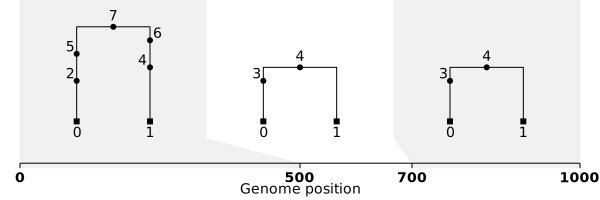

In [83]:
#viz.D3ARG(ts=ts).draw(edge_type="ortho")
ts_sim, maps_sim = ts.simplify(samples= [0,1], map_nodes = True, keep_unary = True, keep_input_roots = True)
viz.D3ARG(ts=ts_sim).draw(edge_type="ortho")
ts_nodes_to_keep = np.where(maps_sim != -1)[0]
print(ts_nodes_to_keep)
ts_new, maps_new = ts.simplify(samples = ts_nodes_to_keep, map_nodes = True, update_sample_flags = False, keep_unary = True, keep_input_roots = True)
print(ts_new.tables.edges, ts_new.tables.nodes, maps_new)
#viz.D3ARG(ts=ts_new).draw(edge_type="ortho")
ts_new.draw_svg()

In [6]:
print(ts_sim.tables.edges)
print(ts_sim.tables.nodes)


╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  500│     2│    0│        ║
║1 │ 500│ 1000│     3│    0│        ║
║2 │   0│ 1000│     4│    1│        ║
║3 │ 500│ 1000│     4│    3│        ║
║4 │   0│  500│     5│    2│        ║
║5 │   0│  500│     6│    4│        ║
║6 │   0│  500│     7│    5│        ║
║7 │   0│  500│     7│    6│        ║
╚══╧════╧═════╧══════╧═════╧════════╝

╔══╤══════╤══════════╤══════════╤══════════╤════════╗
║id│flags │population│individual│time      │metadata║
╠══╪══════╪══════════╪══════════╪══════════╪════════╣
║0 │     1│        -1│         0│0.00000000│        ║
║1 │     1│        -1│         1│0.00000000│        ║
║2 │131072│        -1│        -1│0.75000000│        ║
║3 │131072│        -1│        -1│0.75000000│        ║
║4 │     0│        -1│        -1│1.00000000│        ║
║5 │131072│        -1│        -1│1.25000000│        ║
║6 │     0│        -1│        -1│1.50000000│        ║
║7 

# Variance in a lineage backwards in time

In [3]:
def ts_singlecompound(x=0.25, y=0.125, t=1 ):     
    ts_singlecompound = tskit.TableCollection(sequence_length=1e3)
    
    node_table = ts_singlecompound.nodes
    node_table.set_columns(
        flags = np.array([1, 1, 131072, 131072, 0, 0], dtype=np.uint32),
        time = np.array([ 0.0, 0.0, (1-x)*t, (1-x)*t, (1-y)*t, t ]),
        individual = np.array(list(range(2)) + [-1,-1,-1,-1], dtype = np.int32)
    )
    
    individual_table = ts_singlecompound.individuals 
    individual_table.set_columns( 
        flags = np.array([0,0], dtype = np.uint32),
        location = np.array([-0.5,0.5]),
        location_offset = np.array([0,1,2], dtype = np.uint64) 
    )
    
    edge_table = ts_singlecompound.edges
    edge_table.set_columns(
        left=np.array([0.0, 5e2, 0.0, 0.0, 5e2, 0]),
        right=np.array([5e2, 1e3, 1e3, 5e2, 1e3, 1e3]),
        parent=np.array([2, 3, 4, 4, 5, 5], dtype=np.int32),  # References IDs in the node table
        child=np.array([0, 0, 1, 2, 3, 4], dtype=np.int32),  # References IDs in the node table
    )
    ts_singlecompound.sort()
    return ts_singlecompound.tree_sequence()

def ts_minimal_check(t=1): 
    
    ts_minimal_check = tskit.TableCollection(sequence_length = 1e3)

    node_table = ts_minimal_check.nodes
    node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 0)  # Node 0
    node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 1)  # Node 1
    node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 2)  # Node 2
    node_table.add_row(time=t, flags=msprime.NODE_IS_RE_EVENT)  # Node 3
    node_table.add_row(time=t, flags=msprime.NODE_IS_RE_EVENT) # Node 4 
    node_table.add_row(time=2*t)  # Node 5
    node_table.add_row(time=3*t)  # Node 6
    node_table.add_row(time=4*t, flags=msprime.NODE_IS_RE_EVENT)  # Node 7
    node_table.add_row(time=4*t, flags=msprime.NODE_IS_RE_EVENT)  # Node 8
    node_table.add_row(time=5*t)  # Node 9
    node_table.add_row(time=6*t)  # Node 10

    edge_table = ts_minimal_check.edges
    edge_table.add_row(left=0, right=500, parent=3, child=0)
    edge_table.add_row(left=500, right=1e3, parent=4, child=0)
    edge_table.add_row(left=0, right=1e3, parent=5, child=1)
    edge_table.add_row(left=0, right=1e3, parent=9, child=2)
    edge_table.add_row(left=0, right=500, parent=5, child=3)
    edge_table.add_row(left=500, right=1e3, parent=6, child=4)
    edge_table.add_row(left=0, right=1e3, parent=6, child=5)
    edge_table.add_row(left=0, right=700, parent=7, child=6)
    edge_table.add_row(left=700, right=1e3, parent=8, child=6)
    edge_table.add_row(left=0, right=700, parent=9, child=7)
    edge_table.add_row(left=700, right=1e3, parent=10, child=8)
    edge_table.add_row(left=0, right=1e3, parent=10, child=9)

    individuals_table = ts_minimal_check.individuals 
    individuals_table.add_row(flags = 0)
    individuals_table.add_row(flags = 0)
    individuals_table.add_row(flags = 0)
    
    ts_minimal_check.sort()
    return ts_minimal_check.tree_sequence()

ts = ts_minimal_check()
print(ts.draw_text())


6.00┊  10   ┊  10   ┊  10   ┊  
    ┊   ┃   ┊   ┃   ┊  ┏┻━┓ ┊  
5.00┊   9   ┊   9   ┊  ┃  9 ┊  
    ┊  ┏┻━┓ ┊  ┏┻━┓ ┊  ┃  ┃ ┊  
4.00┊  7  ┃ ┊  7  ┃ ┊  8  ┃ ┊  
    ┊  ┃  ┃ ┊  ┃  ┃ ┊  ┃  ┃ ┊  
3.00┊  6  ┃ ┊  6  ┃ ┊  6  ┃ ┊  
    ┊  ┃  ┃ ┊ ┏┻┓ ┃ ┊ ┏┻┓ ┃ ┊  
2.00┊  5  ┃ ┊ ┃ 5 ┃ ┊ ┃ 5 ┃ ┊  
    ┊ ┏┻┓ ┃ ┊ ┃ ┃ ┃ ┊ ┃ ┃ ┃ ┊  
1.00┊ 3 ┃ ┃ ┊ 4 ┃ ┃ ┊ 4 ┃ ┃ ┊  
    ┊ ┃ ┃ ┃ ┊ ┃ ┃ ┃ ┊ ┃ ┃ ┃ ┊  
0.00┊ 0 1 2 ┊ 0 1 2 ┊ 0 1 2 ┊  
    0      500     700    1000 



In [4]:
cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts)
cov_mat, paths = sparg.calc_covariance_matrix(ts)
print(np.linalg.matrix_rank(cov_min_mat),cov_min_mat,min_paths)
print(np.linalg.matrix_rank(cov_mat),cov_mat,paths)


5 [[6. 2. 1. 4. 2.]
 [2. 6. 0. 1. 3.]
 [1. 0. 6. 1. 0.]
 [4. 1. 1. 6. 4.]
 [2. 3. 0. 4. 6.]] [[0, 3, 5, 6, 7, 9, 10], [1, 5, 6, 8, 10], [2, 9, 10], [0, 4, 6, 7, 9, 10], [0, 4, 6, 8, 10]]
5 [[6. 4. 1. 4. 2. 2. 4.]
 [4. 6. 1. 3. 1. 4. 2.]
 [1. 1. 6. 1. 0. 0. 0.]
 [4. 3. 1. 6. 4. 1. 2.]
 [2. 1. 0. 4. 6. 3. 4.]
 [2. 4. 0. 1. 3. 6. 4.]
 [4. 2. 0. 2. 4. 4. 6.]] [[0, 3, 5, 6, 7, 9, 10], [1, 5, 6, 7, 9, 10], [2, 9, 10], [0, 4, 6, 7, 9, 10], [0, 4, 6, 8, 10], [1, 5, 6, 8, 10], [0, 3, 5, 6, 8, 10]]


/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


2.00┊  5  ┊  5  ┊  
    ┊  ┃  ┊ ┏┻┓ ┊  
1.75┊  4  ┊ ┃ 4 ┊  
    ┊ ┏┻┓ ┊ ┃ ┃ ┊  
1.50┊ 2 ┃ ┊ 3 ┃ ┊  
    ┊ ┃ ┃ ┊ ┃ ┃ ┊  
0.00┊ 0 1 ┊ 0 1 ┊  
    0    500  1000 

[[0, 2, 4, 5], [1, 4, 5], [0, 3, 5]]


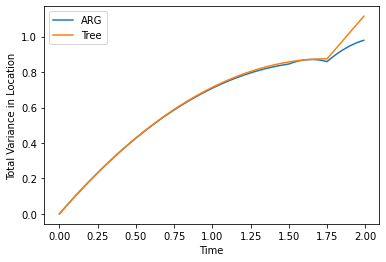

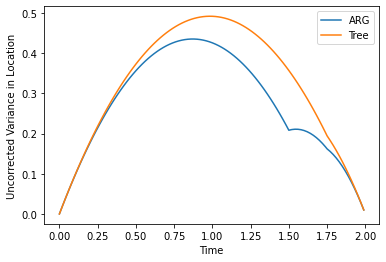

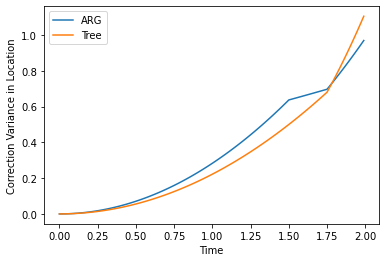

2.00┊  5  ┊ 
    ┊ ┏┻┓ ┊ 
1.75┊ ┃ 4 ┊ 
    ┊ ┃ ┃ ┊ 
1.50┊ 3 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    500

[[0, 2, 4, 5], [1, 4, 5], [0, 3, 5]]


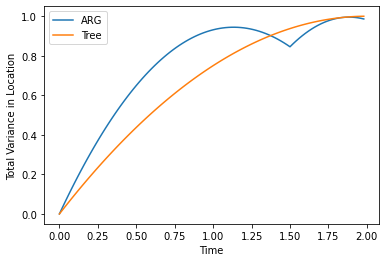

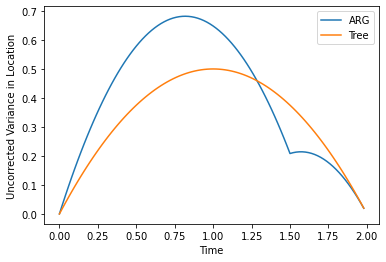

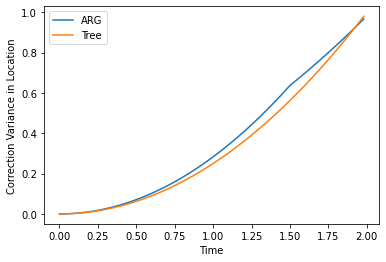

2.00┊  5  ┊ 
    ┊  ┃  ┊ 
1.75┊  4  ┊ 
    ┊ ┏┻┓ ┊ 
1.50┊ 2 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    500

[[0, 2, 4, 5], [1, 4, 5], [0, 3, 5]]


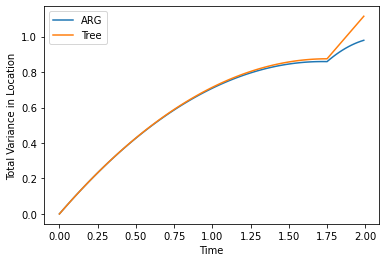

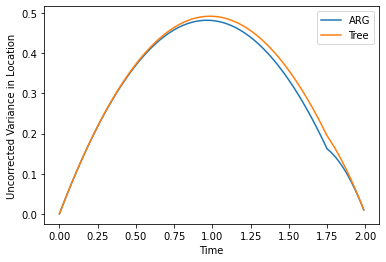

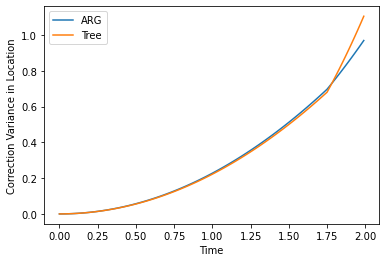

2.00┊  5  ┊ 
    ┊ ┏┻┓ ┊ 
1.75┊ ┃ 4 ┊ 
    ┊ ┃ ┃ ┊ 
1.50┊ 3 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    500

[[0, 2, 4, 5], [1, 4, 5], [0, 3, 5]]


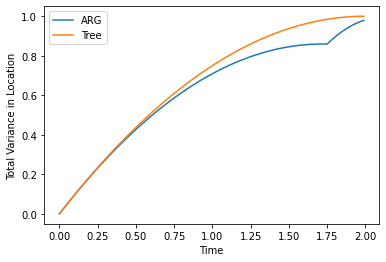

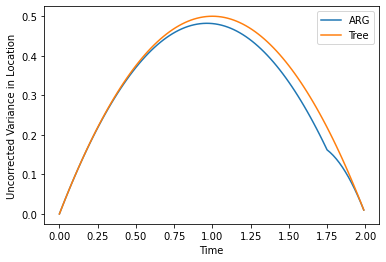

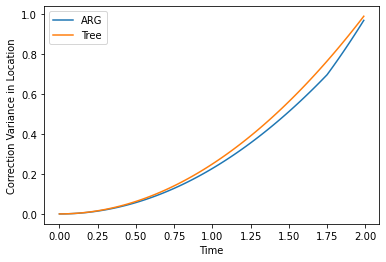

0

In [11]:
def track_single_lineage(ts, ts_tree, path): 
    sigma, cov_mat, paths, locations_of_nodes, corrected_variances_in_node_locations, node_shared_times, node_paths, inverted_cov_mat = sparg.estimate_minimal_spatial_parameters(ts, verbose=False, record_to="", locations_of_individuals={}, return_ancestral_node_positions=path, n_r=False, dimensions=1)
    sigma_tree, cov_mat_tree, paths_tree, locations_of_nodes_tree, corrected_variances_in_node_locations_tree, node_shared_times_tree, node_paths_tree, inverted_cov_mat_tree = sparg.estimate_minimal_spatial_parameters(ts_tree, verbose=False, record_to="", locations_of_individuals={}, return_ancestral_node_positions=path, n_r=False, dimensions=1)
    paths_edges = [ np.column_stack([path[:-1],path[1:]]) for path in paths ]
    paths_edges_tree = [ np.column_stack([path[:-1],path[1:]]) for path in paths_tree ]
    print(paths)  
    interval = (ts.tables.nodes.time[path[-1]] - ts.tables.nodes.time[path[0]])/100
    node_times = []
    node_location_variance_total = [] 
    node_location_variance_total_tree = [] 

    node_location_variance_uncorrected = [] 
    node_location_variance_uncorrected_tree = [] 

    node_location_variance_correction = [] 
    node_location_variance_correction_tree = [] 


    ones = np.ones(inverted_cov_mat.shape[0])
    correction_denominator = np.matmul(np.matmul(np.transpose(ones), inverted_cov_mat), ones)
    ones_tree = np.ones(inverted_cov_mat_tree.shape[0])
    correction_denominator_tree = np.matmul(np.matmul(np.transpose(ones_tree),inverted_cov_mat_tree),ones_tree)

    for i in range(len(path) - 1):
        #print(i)
        node = path[i]
        node_time = ts.tables.nodes.time[node] 
        nxt_node = path[i+1]
        nxt_node_time = ts.tables.nodes.time[nxt_node]
        edge_in_path = np.array([ 1 if np.any(np.all([node, nxt_node] == path_edges, axis=1)) else 0 for path_edges in paths_edges ])
        edge_in_path_tree = np.array([ 1 if np.any(np.all([node, nxt_node] == path_edges_tree, axis=1)) in path_edges_tree else 0 for path_edges_tree in paths_edges_tree ])
        
        for tm in np.arange(node_time, nxt_node_time, interval ): 
            node_times += [tm]
            start_node_sharing = node_shared_times[i,:]
            end_node_sharing = node_shared_times[i+1,:]
            x = (tm-node_time)/(nxt_node_time - node_time)

            node_specific_sharing = (1-x)*start_node_sharing + x*end_node_sharing
            #node_specific_sharing = end_node_sharing + x*(nxt_node_time-node_time)*edge_in_path
            #print(x, node_specific_sharing, start_node_sharing, end_node_sharing, edge_in_path)
            
            uncorrected_variance = ts.max_root_time - tm - np.matmul(np.matmul(node_specific_sharing, inverted_cov_mat), np.transpose(node_specific_sharing))
            node_location_variance_uncorrected += [uncorrected_variance]

            correction_numerator = (1-np.matmul(np.matmul(np.transpose(node_specific_sharing),inverted_cov_mat),ones))**2
            correction = correction_numerator/correction_denominator 
            node_location_variance_correction += [correction]       

            corrected_variance_scaling_factor = uncorrected_variance + correction 
            node_location_variance_total += [corrected_variance_scaling_factor]
            
            start_node_sharing_tree = node_shared_times_tree[i,:]
            end_node_sharing_tree = node_shared_times_tree[i+1,:]

            node_specific_sharing_tree = (1-x)*start_node_sharing_tree + x*end_node_sharing_tree
            #node_specific_sharing_tree = end_node_sharing_tree + x*(nxt_node_time-node_time)*edge_in_path_tree
            #print(x, node_specific_sharing, start_node_sharing, end_node_sharing)

            uncorrected_variance_tree = ts_tree.max_root_time - tm - np.matmul(np.matmul(node_specific_sharing_tree, inverted_cov_mat_tree), np.transpose(node_specific_sharing_tree))
            node_location_variance_uncorrected_tree += [uncorrected_variance_tree]

            correction_numerator_tree = (1-np.matmul(np.matmul(np.transpose(node_specific_sharing_tree),inverted_cov_mat_tree),ones_tree))**2
            correction_tree = correction_numerator_tree/correction_denominator_tree
            node_location_variance_correction_tree += [correction_tree]

            corrected_variance_scaling_factor_tree = uncorrected_variance_tree + correction_tree
            node_location_variance_total_tree += [corrected_variance_scaling_factor_tree]

        
    plt.plot(node_times, node_location_variance_total, label="ARG")
    plt.plot(node_times, node_location_variance_total_tree, label="Tree")
    plt.xlabel("Time")
    plt.ylabel("Total Variance in Location")
    plt.legend()
    plt.show() 

    plt.plot(node_times, node_location_variance_uncorrected, label="ARG")
    plt.plot(node_times, node_location_variance_uncorrected_tree, label="Tree")
    plt.xlabel("Time")
    plt.ylabel("Uncorrected Variance in Location")
    plt.legend()
    plt.show()

    plt.plot(node_times, node_location_variance_correction, label="ARG")
    plt.plot(node_times, node_location_variance_correction_tree, label="Tree")
    plt.xlabel("Time")
    plt.ylabel("Correction Variance in Location")
    plt.legend()
    plt.show()
     
    return 0

ts = ts_singlecompound(t=2)
ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[:2]]), simplify=False).trim()
viz.D3ARG(ts=ts).draw(edge_type="ortho")
print(ts.draw_text())
path = [0,2,4,5]
track_single_lineage(ts, ts_tree, path)


ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[1:]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [0,3,5]
track_single_lineage(ts, ts_tree, path)

ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[:2]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [1,4,5]
track_single_lineage(ts, ts_tree, path)

ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[1:]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [1,4,5]
track_single_lineage(ts, ts_tree, path)


2.25┊ 11  ┊ 11  ┊ 11  ┊ 11  ┊  
    ┊  ┃  ┊  ┃  ┊  ┃  ┊ ┏┻┓ ┊  
2.00┊ 10  ┊ 10  ┊ 10  ┊ ┃10 ┊  
    ┊  ┃  ┊  ┃  ┊ ┏┻┓ ┊ ┃ ┃ ┊  
1.75┊  ┃  ┊  ┃  ┊ 9 ┃ ┊ 8 ┃ ┊  
    ┊  ┃  ┊  ┃  ┊ ┃ ┃ ┊ ┃ ┃ ┊  
1.50┊  7  ┊  7  ┊ ┃ 7 ┊ ┃ 7 ┊  
    ┊  ┃  ┊ ┏┻┓ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
1.25┊  ┃  ┊ 6 ┃ ┊ 5 ┃ ┊ 5 ┃ ┊  
    ┊  ┃  ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
1.00┊  4  ┊ ┃ 4 ┊ ┃ 4 ┊ ┃ 4 ┊  
    ┊ ┏┻┓ ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
0.75┊ 3 ┃ ┊ 2 ┃ ┊ 2 ┃ ┊ 2 ┃ ┊  
    ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
0.00┊ 0 1 ┊ 0 1 ┊ 0 1 ┊ 0 1 ┊  
    0    250   500   750  1000 



/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


2.25┊ 11  ┊ 
    ┊  ┃  ┊ 
2.00┊ 10  ┊ 
    ┊  ┃  ┊ 
1.75┊  ┃  ┊ 
    ┊  ┃  ┊ 
1.50┊  7  ┊ 
    ┊  ┃  ┊ 
1.25┊  ┃  ┊ 
    ┊  ┃  ┊ 
1.00┊  4  ┊ 
    ┊ ┏┻┓ ┊ 
0.75┊ 3 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    250

[[0, 2, 5, 8, 11], [1, 4, 7, 10, 11], [0, 3, 4, 7, 10, 11], [0, 2, 6, 7, 10, 11], [0, 2, 5, 9, 10, 11]]


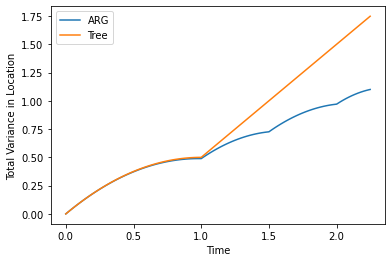

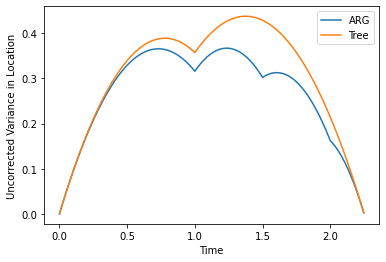

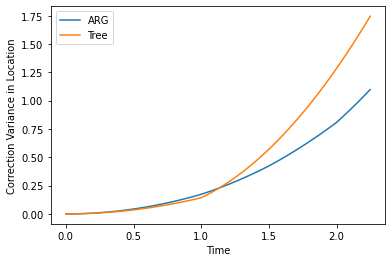

2.25┊ 11  ┊ 
    ┊  ┃  ┊ 
2.00┊ 10  ┊ 
    ┊  ┃  ┊ 
1.75┊  ┃  ┊ 
    ┊  ┃  ┊ 
1.50┊  7  ┊ 
    ┊ ┏┻┓ ┊ 
1.25┊ 6 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
1.00┊ ┃ 4 ┊ 
    ┊ ┃ ┃ ┊ 
0.75┊ 2 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    250

[[0, 2, 5, 8, 11], [1, 4, 7, 10, 11], [0, 3, 4, 7, 10, 11], [0, 2, 6, 7, 10, 11], [0, 2, 5, 9, 10, 11]]


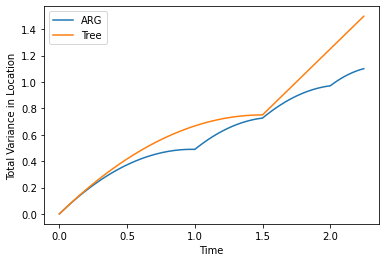

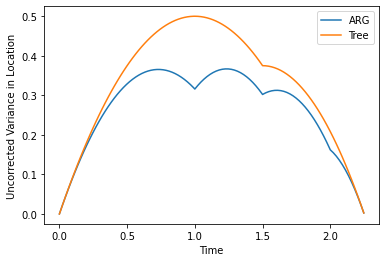

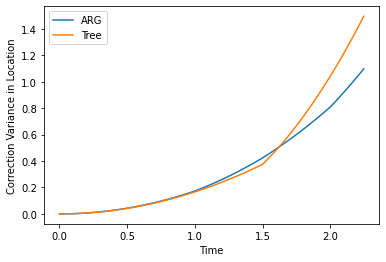

2.25┊ 11  ┊ 
    ┊  ┃  ┊ 
2.00┊ 10  ┊ 
    ┊ ┏┻┓ ┊ 
1.75┊ 9 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
1.50┊ ┃ 7 ┊ 
    ┊ ┃ ┃ ┊ 
1.25┊ 5 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
1.00┊ ┃ 4 ┊ 
    ┊ ┃ ┃ ┊ 
0.75┊ 2 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    250

[[0, 2, 5, 8, 11], [1, 4, 7, 10, 11], [0, 3, 4, 7, 10, 11], [0, 2, 6, 7, 10, 11], [0, 2, 5, 9, 10, 11]]


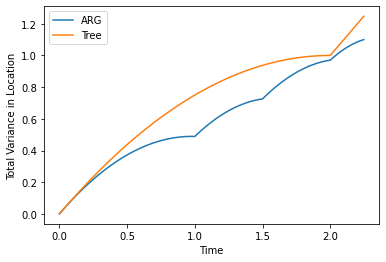

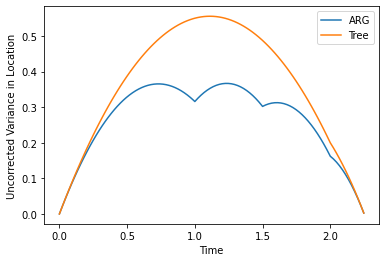

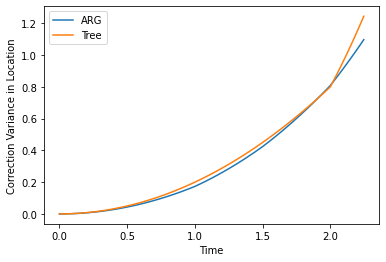

2.25┊ 11  ┊ 
    ┊ ┏┻┓ ┊ 
2.00┊ ┃10 ┊ 
    ┊ ┃ ┃ ┊ 
1.75┊ 8 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
1.50┊ ┃ 7 ┊ 
    ┊ ┃ ┃ ┊ 
1.25┊ 5 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
1.00┊ ┃ 4 ┊ 
    ┊ ┃ ┃ ┊ 
0.75┊ 2 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    250

[[0, 2, 5, 8, 11], [1, 4, 7, 10, 11], [0, 3, 4, 7, 10, 11], [0, 2, 6, 7, 10, 11], [0, 2, 5, 9, 10, 11]]


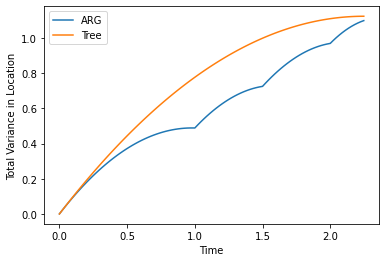

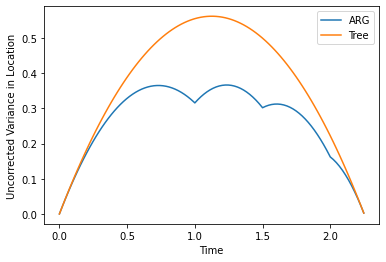

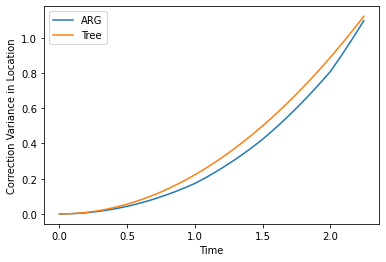

0

In [12]:
ts = sparg.ts_stacked(n=3)
ts_tables = ts.dump_tables() 
ts_edges = ts_tables.edges
ts_edges.left = [250, 0, 0, 0, 500, 250, 0, 250, 750, 500, 0, 500, 750, 0]
ts_tables.sort() 
ts = ts_tables.tree_sequence()
print(ts.draw_text())
viz.D3ARG(ts=ts).draw(edge_type="ortho")


ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[:2]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [1,4,7,10,11]
track_single_lineage(ts, ts_tree, path)

ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[1:3]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [1,4,7,10,11]
track_single_lineage(ts, ts_tree, path)

ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[2:4]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [1,4,7,10,11]
track_single_lineage(ts, ts_tree, path)


ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[3:]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [1,4,7,10,11]
track_single_lineage(ts, ts_tree, path)



2.25┊ 11  ┊ 
    ┊  ┃  ┊ 
2.00┊ 10  ┊ 
    ┊  ┃  ┊ 
1.75┊  ┃  ┊ 
    ┊  ┃  ┊ 
1.50┊  7  ┊ 
    ┊ ┏┻┓ ┊ 
1.25┊ 6 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
1.00┊ ┃ 4 ┊ 
    ┊ ┃ ┃ ┊ 
0.75┊ 2 ┃ ┊ 
    ┊ ┃ ┃ ┊ 
0.00┊ 0 1 ┊ 
    0    250

[[0, 2, 5, 8, 11], [1, 4, 7, 10, 11], [0, 3, 4, 7, 10, 11], [0, 2, 6, 7, 10, 11], [0, 2, 5, 9, 10, 11]]


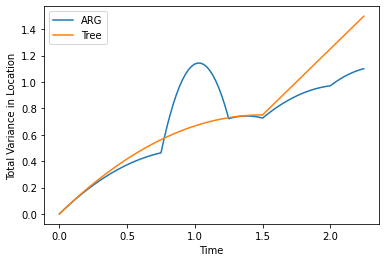

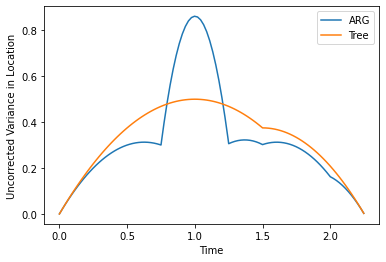

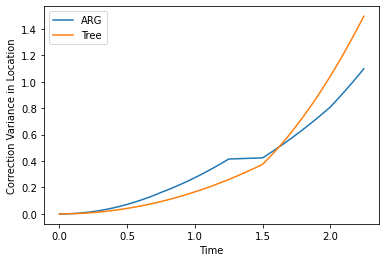

0

In [8]:
ts_tree = ts.keep_intervals( np.array([ts.breakpoints(as_array=True)[1:3]]), simplify=False).trim()
print(ts_tree.draw_text())
path = [0,2,6,7,10,11]
track_single_lineage(ts, ts_tree, path)

/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


2.25┊ 11  ┊ 11  ┊ 11  ┊ 11  ┊  
    ┊  ┃  ┊  ┃  ┊  ┃  ┊ ┏┻┓ ┊  
2.00┊ 10  ┊ 10  ┊ 10  ┊ ┃10 ┊  
    ┊  ┃  ┊  ┃  ┊ ┏┻┓ ┊ ┃ ┃ ┊  
1.75┊  ┃  ┊  ┃  ┊ 9 ┃ ┊ 8 ┃ ┊  
    ┊  ┃  ┊  ┃  ┊ ┃ ┃ ┊ ┃ ┃ ┊  
1.50┊  7  ┊  7  ┊ ┃ 7 ┊ ┃ 7 ┊  
    ┊  ┃  ┊ ┏┻┓ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
1.25┊  ┃  ┊ 6 ┃ ┊ 5 ┃ ┊ 5 ┃ ┊  
    ┊  ┃  ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
1.00┊  4  ┊ ┃ 4 ┊ ┃ 4 ┊ ┃ 4 ┊  
    ┊ ┏┻┓ ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
0.75┊ 3 ┃ ┊ 2 ┃ ┊ 2 ┃ ┊ 2 ┃ ┊  
    ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊ ┃ ┃ ┊  
0.00┊ 0 1 ┊ 0 1 ┊ 0 1 ┊ 0 1 ┊  
    0    250   500   750  1000 



In [46]:
[0, 6] in np.array([[0, 3], [3, 5]])

True

In [17]:
a = np.array([1,2])
B = np.array( [[1,2],[3,4]])

In [20]:
np.matmul(B,np.transpose(a))

array([ 5, 11])

In [21]:
np.transpose(a)

array([1, 2])

In [56]:
ts.breakpoints(as_array=True)
print(ts_tree.tables.edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  500│     2│    0│        ║
║1 │   0│  500│     4│    1│        ║
║2 │   0│  500│     4│    2│        ║
║3 │   0│  500│     5│    4│        ║
╚══╧════╧═════╧══════╧═════╧════════╝



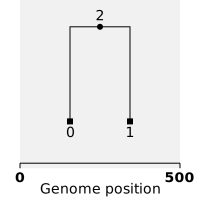

In [62]:
ts_tree.draw_svg()

In [3]:
ts = tskit.load("slim/slim_0.25rep1sigma.trees")


In [4]:
uniq_child_parent = np.unique(np.column_stack((ts.edges_child, ts.edges_parent)), axis=0) #Find unique parent-child pairs. 
nd, count = np.unique(uniq_child_parent[:, 0], return_counts=True) #For each child, count how many parents it has. 
multiple_parents = nd[count > 1] #Find children who have more than 1 parent. 
recomb_nodes = ts.edges_parent[np.in1d(ts.edges_child, multiple_parents)]

In [9]:
for child in multiple_parents:
    pts = ts.tables.edges.parent[np.where(ts.tables.edges.child == child)[0]]
    print(len(np.unique(ts.tables.nodes.individual[np.array(pts)])) == 1 )
    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


KeyboardInterrupt: 